In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import scipy.io
import pandas as pd
import cosima_cookbook as cc
import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate
from scipy import stats
import gsw

from glob import glob as gb
import cartopy.crs as ccrs
import cartopy.feature as cft
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)
import matplotlib.gridspec as gridspec

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

session = cc.database.create_session()

Available exptdata keys:  ['1deg', '025deg', '01deg']


In [9]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [2]:
input_path = '/g/data/e14/erd561/Australia_3/'

# blonw=122
# blone=138
# blats=-50
# blatn=-43

lonW = 122
lonE = 138
latN = -30
latS = -60

mld_z0_obs = xr.open_dataset(input_path + 'mld_z0_obs.nc').mld_z0_obs.\
sel(lon=slice(lonW, lonE)).sel(lat=slice(latS, latN)).mean('lon')
print(mld_z0_obs)
mld_z0_slope_obs = xr.open_dataset(input_path + 'mld_z0_slope_obs.nc').mld_z0_slope_obs.\
sel(lon=slice(lonW, lonE)).sel(lat=slice(latS, latN)).mean('lon')*10
print(mld_z0_slope_obs)
mld_z0_p_value_obs = xr.open_dataset(input_path + 'mld_z0_p_value_obs.nc').mld_z0_p_value_obs
print(mld_z0_p_value_obs)
mld_z0_std_err_obs = xr.open_dataset(input_path + 'mld_z0_std_err_obs.nc').mld_z0_std_err_obs*10
print(mld_z0_std_err_obs)

mld_z0_1_mod = xr.open_dataset(input_path + 'mld_z0_1_mod.nc').mld_z0_1_mod.\
sel(xt_ocean=slice(lonW, lonE)).sel(yt_ocean=slice(latS, latN)).mean('xt_ocean')
print(mld_z0_1_mod)
mld_z0_1_slope_mod = xr.open_dataset(input_path + 'mld_z0_1_slope_mod.nc').mld_z0_1_slope_mod.\
sel(xt_ocean=slice(lonW, lonE)).sel(yt_ocean=slice(latS, latN)).mean('xt_ocean')*10
print(mld_z0_1_slope_mod)
mld_z0_1_p_value_mod = xr.open_dataset(input_path + 'mld_z0_1_p_value_mod.nc').mld_z0_1_p_value_mod
print(mld_z0_1_p_value_mod)
mld_z0_1_std_err_mod = xr.open_dataset(input_path + 'mld_z0_1_std_err_mod.nc').mld_z0_1_std_err_mod*10
print(mld_z0_1_std_err_mod)

mld_z0_025_mod = xr.open_dataset(input_path + 'mld_z0_025_mod.nc').mld_z0_025_mod.\
sel(xt_ocean=slice(lonW, lonE)).sel(yt_ocean=slice(latS, latN)).mean('xt_ocean')
print(mld_z0_025_mod)
mld_z0_025_slope_mod = xr.open_dataset(input_path + 'mld_z0_025_slope_mod.nc').mld_z0_025_slope_mod.\
sel(xt_ocean=slice(lonW, lonE)).sel(yt_ocean=slice(latS, latN)).mean('xt_ocean')*10
print(mld_z0_025_slope_mod)
mld_z0_025_p_value_mod = xr.open_dataset(input_path + 'mld_z0_025_p_value_mod.nc').mld_z0_025_p_value_mod
print(mld_z0_025_p_value_mod)
mld_z0_025_std_err_mod = xr.open_dataset(input_path + 'mld_z0_025_std_err_mod.nc').mld_z0_025_std_err_mod*10
print(mld_z0_025_std_err_mod)

mld_z0_01_mod = xr.open_dataset(input_path + 'mld_z0_01_mod.nc').mld_z0_01_mod.\
sel(xt_ocean=slice(lonW, lonE)).sel(yt_ocean=slice(latS, latN)).mean('xt_ocean')
print(mld_z0_01_mod)
mld_z0_01_slope_mod = xr.open_dataset(input_path + 'mld_z0_01_slope_mod.nc').mld_z0_01_slope_mod.\
sel(xt_ocean=slice(lonW, lonE)).sel(yt_ocean=slice(latS, latN)).mean('xt_ocean')*10
print(mld_z0_01_slope_mod)
mld_z0_01_p_value_mod = xr.open_dataset(input_path + 'mld_z0_01_p_value_mod.nc').mld_z0_01_p_value_mod
print(mld_z0_01_p_value_mod)
mld_z0_01_std_err_mod = xr.open_dataset(input_path + 'mld_z0_01_std_err_mod.nc').mld_z0_01_std_err_mod*10
print(mld_z0_01_std_err_mod)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'mld_z0_obs' (lat: 31, year: 14)>
array([[ 95.515625  ,  91.47916667,  93.546875  ,  85.75520833,
         93.96354167,  89.58854167,  99.91145833, 106.30729167,
         99.60416667,  95.83333333,  89.9375    , 102.98958333,
        100.75      ,  85.03645833],
       [102.27083333,  95.96354167, 100.15625   ,  90.54166667,
        101.90104167,  93.765625  , 101.97395833, 106.359375  ,
        102.32291667, 100.00520833,  97.84895833, 110.96354167,
        105.36979167,  94.0625    ],
       [106.53125   , 100.58333333, 105.453125  ,  92.90625   ,
        107.05729167,  96.79166667, 104.83854167, 107.91145833,
        109.44791667, 103.39583333, 103.05208333, 115.78125   ,
        112.07291667, 100.90104167],
       [109.4375    , 104.97916667, 110.86979167,  94.21354167,
        110.27083333,  97.64583333, 111.84375   , 117.578125  ,
        117.05729167, 105.75520833, 106.109375  , 122.16145833,
        117.58854167, 104.88020833],
       [112.63020833, 107.239583

<xarray.DataArray 'mld_z0_01_mod' (yt_ocean: 440, year: 14)>
array([[ 92.37093 ,  97.96987 , 107.89807 , ..., 120.56509 , 112.49916 ,
        104.797226],
       [ 92.82144 ,  98.20309 , 108.28169 , ..., 121.27118 , 112.77458 ,
        105.44236 ],
       [ 93.222275,  98.18176 , 108.67091 , ..., 121.98163 , 112.996445,
        106.02515 ],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * yt_ocean  (yt_ocean) float64 -60.0 -59.95 -59.9 ... -30.24 -30.15 -30.07
  * year      (year) int64 2004 2005 2006 2007 2008 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'mld_z0_01_slope_mod' (yt_ocean: 440)>
array([ 1.05716399e+01,  1.07010905e+01,  1.08887644e+01,  1.10812066e+01,
        1.11402212e+01,  1.12323076e+01,  1.

In [3]:
# blonw=122
# blone=138
# blats=-50
# blatn=-43

lonW = 122
lonE = 138
latN = -30
latS = -60

input_path = '/g/data/e14/erd561/ARGO/'
temp_LTM = xr.open_dataset(input_path + 'RG_ArgoClim_Temperature_2017.nc', decode_times=False).\
                ARGO_TEMPERATURE_MEAN.\
                sel(LONGITUDE=slice(lonW, lonE)).\
                sel(LATITUDE=slice(latS, latN))
print(temp_LTM)


temp_months = xr.open_dataset(input_path + 'RG_ArgoClim_Temperature_2017.nc', decode_times=False).\
                ARGO_TEMPERATURE_ANOMALY.\
                sel(LONGITUDE=slice(lonW, lonE)).\
                sel(LATITUDE=slice(latS, latN))
# print(temp_months)

TIME = [pd.date_range('15/1/2004',periods=156, freq=pd.DateOffset(months=1))]
# print(TIME)

temp_months = temp_months.assign_coords(TIME=np.squeeze(TIME))
# print(temp_months)

temp = temp_months.groupby('TIME.year').mean('TIME', skipna=True)
# print(temp)

temp_2004_2016 = temp.sel(year=slice(1993,2017))
print(temp_2004_2016)



temp_2017 = xr.open_mfdataset(sorted(gb(input_path + 'RG_ArgoClim_2017*.nc')), decode_times=False).\
                ARGO_TEMPERATURE_ANOMALY.\
                sel(LONGITUDE=slice(lonW, lonE)).\
                sel(LATITUDE=slice(latS, latN)).\
                assign_coords(TIME=np.squeeze([pd.date_range('15/1/2017',periods=12, freq=pd.DateOffset(months=1))])).\
                groupby('TIME.year').mean('TIME', skipna=True)
temp_2017.load()
print(temp_2017)


temp = xr.concat([temp_2004_2016, temp_2017], dim='year') + temp_LTM
# print(temp)

temp = temp.assign_coords(PRESSURE=gsw.z_from_p(temp.PRESSURE, np.mean(temp.LATITUDE))).mean('LONGITUDE')
print(temp)

year = temp.year
depth = temp.PRESSURE
lat = temp.LATITUDE

# temp_trans = np.transpose(temp, (2,1,0))
temp_trans = temp
print(np.shape(temp_trans))
temp_slope = xr.DataArray(
    np.zeros([np.shape(depth)[0], np.shape(lat)[0]]), dims=(
    'depth', 'lat'), coords=[depth, lat], name='temp')
temp_p_value = xr.DataArray(
    np.zeros([np.shape(depth)[0], np.shape(lat)[0]]), dims=(
    'depth', 'lat'), coords=[depth, lat], name='temp')
temp_std_err = xr.DataArray(
    np.zeros([np.shape(depth)[0], np.shape(lat)[0]]), dims=(
    'depth', 'lat'), coords=[depth, lat], name='temp')
for iid, i in enumerate(depth):
    for jid, j in enumerate(lat):
        temp_slope[iid, jid], _, _, temp_p_value[iid, jid], temp_std_err[iid, jid] = \
        stats.linregress(year, temp_trans[:, iid, jid])
    print('depth ' + str(np.array(i)))
print(temp_slope)

temp_slope *= 10

<xarray.DataArray 'ARGO_TEMPERATURE_MEAN' (PRESSURE: 58, LATITUDE: 30, LONGITUDE: 16)>
array([[[1.142, 1.204, ..., 1.453, 1.435],
        [1.742, 1.779, ..., 2.034, 2.077],
        ...,
        [  nan,   nan, ...,   nan,   nan],
        [  nan,   nan, ...,   nan,   nan]],

       [[1.137, 1.199, ..., 1.444, 1.428],
        [1.736, 1.775, ..., 2.028, 2.071],
        ...,
        [  nan,   nan, ...,   nan,   nan],
        [  nan,   nan, ...,   nan,   nan]],

       ...,

       [[1.239, 1.257, ..., 1.377, 1.376],
        [1.356, 1.375, ..., 1.492, 1.501],
        ...,
        [  nan,   nan, ...,   nan,   nan],
        [  nan,   nan, ...,   nan,   nan]],

       [[1.186, 1.202, ..., 1.318, 1.314],
        [1.294, 1.311, ..., 1.43 , 1.432],
        ...,
        [  nan,   nan, ...,   nan,   nan],
        [  nan,   nan, ...,   nan,   nan]]], dtype=float32)
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 122.5 123.5 124.5 125.5 ... 135.5 136.5 137.5
  * LATITUDE   (LATITUDE) float32 -59.5 -58

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,
/g/data3/hh5/public/apps/miniconda3/envs/analysis

<xarray.DataArray 'ARGO_TEMPERATURE_ANOMALY' (year: 1, PRESSURE: 58, LATITUDE: 30, LONGITUDE: 16)>
array([[[[ 0.12849998,  0.00233328, -0.15583332, ...,  0.2595833 ,
           0.29308328,  0.3253334 ],
         [ 0.13624997,  0.09616661,  0.04508336, ...,  0.33333328,
           0.342     ,  0.34416667],
         [ 0.02633329,  0.00191669,  0.01216666, ...,  0.3261667 ,
           0.34958336,  0.35066667],
         ...,
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan]],

        [[ 0.13466668,  0.00650005, -0.15416662, ...,  0.2473333 ,
           0.2845833 ,  0.32575002],
         [ 0.13616669,  0.09383329,  0.04058337, ...,  0.32208332,
           0.33250004,  0.3436667 ],
         [ 0.02074997, -0.00183336,  0.00883337, ...,

depth -128.904282647385
depth -138.81663393296603
depth -148.72850556480367
depth -158.63989769095755
depth -168.55081045944524
depth -180.93877754876348
depth -198.28067409845016
depth -218.09818911453658
depth -237.91379024877716
depth -257.7274786827702
depth -277.53925559743544
depth -297.3491221730147
depth -317.1570795890706
depth -336.96312902448705
depth -356.76727165746917
depth -376.5695086655423
depth -396.3698412255524
depth -416.16827051366573
depth -435.964797705368
depth -458.23361865916155
depth -495.3429784466653
depth -544.8117497513008
depth -594.2686806019236
depth -643.7137892776974
depth -693.1470940311292
depth -742.5686130880446
depth -791.9783646475636
depth -841.3763668820762
depth -890.7626379372196
depth -940.1371959318501
depth -989.5000589580214
depth -1038.8512450809574
depth -1088.190772339028
depth -1137.5186587437222
depth -1186.8349222796237
depth -1236.139580904383
depth -1285.4326525486936
depth -1334.7141551162626
depth -1396.299791543012
depth -14

In [4]:
# blonw=122
# blone=138
# blats=-50
# blatn=-43

lonW = 122
lonE = 138
latN = -30
latS = -60
input_path = '/g/data/e14/erd561/ARGO/'
salt_LTM = xr.open_dataset(input_path + 'RG_ArgoClim_Salinity_2017.nc', decode_times=False).\
                ARGO_SALINITY_MEAN.\
                sel(LONGITUDE=slice(lonW, lonE)).\
                sel(LATITUDE=slice(latS, latN))
print(salt_LTM)


salt_months = xr.open_dataset(input_path + 'RG_ArgoClim_Salinity_2017.nc', decode_times=False).\
                ARGO_SALINITY_ANOMALY.\
                sel(LONGITUDE=slice(lonW, lonE)).\
                sel(LATITUDE=slice(latS, latN))
# print(salt_months)

TIME = [pd.date_range('15/1/2004',periods=156, freq=pd.DateOffset(months=1))]
# print(TIME)

salt_months = salt_months.assign_coords(TIME=np.squeeze(TIME))
# print(salt_months)

salt = salt_months.groupby('TIME.year').mean('TIME', skipna=True)
# print(salt)

salt_2004_2016 = salt.sel(year=slice(1993,2017))
print(salt_2004_2016)



salt_2017 = xr.open_mfdataset(sorted(gb(input_path + 'RG_ArgoClim_2017*.nc')), decode_times=False).\
                ARGO_SALINITY_ANOMALY.\
                sel(LONGITUDE=slice(lonW, lonE)).\
                sel(LATITUDE=slice(latS, latN)).\
                assign_coords(TIME=np.squeeze([pd.date_range('15/1/2017',periods=12, freq=pd.DateOffset(months=1))])).\
                groupby('TIME.year').mean('TIME', skipna=True)
salt_2017.load()
print(salt_2017)


salt = xr.concat([salt_2004_2016, salt_2017], dim='year') + salt_LTM
# print(salt)

salt = salt.assign_coords(PRESSURE=gsw.z_from_p(salt.PRESSURE, np.mean(salt.LATITUDE))).mean('LONGITUDE')
print(salt)

year = salt.year
depth = salt.PRESSURE
lat = salt.LATITUDE

# salt_trans = np.transpose(salt, (2,1,0))
salt_trans = salt
print(np.shape(salt_trans))
salt_slope = xr.DataArray(
    np.zeros([np.shape(depth)[0], np.shape(lat)[0]]), dims=(
    'depth', 'lat'), coords=[depth, lat], name='salt')
salt_p_value = xr.DataArray(
    np.zeros([np.shape(depth)[0], np.shape(lat)[0]]), dims=(
    'depth', 'lat'), coords=[depth, lat], name='salt')
salt_std_err = xr.DataArray(
    np.zeros([np.shape(depth)[0], np.shape(lat)[0]]), dims=(
    'depth', 'lat'), coords=[depth, lat], name='salt')
for iid, i in enumerate(depth):
    for jid, j in enumerate(lat):
        salt_slope[iid, jid], _, _, salt_p_value[iid, jid], salt_std_err[iid, jid] = \
        stats.linregress(year, salt_trans[:, iid, jid])
    print('depth ' + str(np.array(i)))
print(salt_slope)

salt_slope *= 10

<xarray.DataArray 'ARGO_SALINITY_MEAN' (PRESSURE: 58, LATITUDE: 30, LONGITUDE: 16)>
array([[[33.882, 33.879, ..., 33.838, 33.836],
        [33.869, 33.866, ..., 33.832, 33.827],
        ...,
        [   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan]],

       [[33.882, 33.879, ..., 33.839, 33.836],
        [33.869, 33.866, ..., 33.832, 33.827],
        ...,
        [   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan]],

       ...,

       [[34.729, 34.73 , ..., 34.735, 34.735],
        [34.734, 34.735, ..., 34.739, 34.739],
        ...,
        [   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan]],

       [[34.726, 34.727, ..., 34.732, 34.732],
        [34.731, 34.732, ..., 34.737, 34.737],
        ...,
        [   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan]]], dtype=float32)
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 122.5 123.5 124.5 125.5 ... 

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/ipykernel_launcher.py:38: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,
/g/data3/hh5/public/apps/miniconda3/envs/analysis

<xarray.DataArray 'ARGO_SALINITY_ANOMALY' (year: 1, PRESSURE: 58, LATITUDE: 30, LONGITUDE: 16)>
array([[[[-9.5833335e-03, -1.9749999e-02, -2.3083335e-02, ...,
           2.0166665e-02,  2.4083333e-02,  2.5666667e-02],
         [ 1.7416669e-02,  9.6666673e-03,  5.2499995e-03, ...,
           2.1250000e-02,  2.3166666e-02,  2.3249999e-02],
         [ 4.1666668e-02,  3.5333335e-02,  2.9666668e-02, ...,
           2.5416667e-02,  2.5166666e-02,  2.3083335e-02],
         ...,
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan]],

        [[-9.9999998e-03, -1.9916667e-02, -2.3166666e-02, ...,
           1.9750001e-02,  2.3500001e-02,  2.5083333e-02],
         [ 1.7083334e-02,  9.50000

depth -9.918600276929064
depth -19.83671897148938
depth -29.75435623229031
depth -39.671512207898985
depth -49.58818704684028
depth -59.50438089759682
depth -69.42009390860898
depth -79.33532622827488
depth -89.25007800495035
depth -99.16434938694897
depth -109.07814052254201
depth -118.99145155995848
depth -128.904282647385
depth -138.81663393296603
depth -148.72850556480367
depth -158.63989769095755
depth -168.55081045944524
depth -180.93877754876348
depth -198.28067409845016
depth -218.09818911453658
depth -237.91379024877716
depth -257.7274786827702
depth -277.53925559743544
depth -297.3491221730147
depth -317.1570795890706
depth -336.96312902448705
depth -356.76727165746917
depth -376.5695086655423
depth -396.3698412255524
depth -416.16827051366573
depth -435.964797705368
depth -458.23361865916155
depth -495.3429784466653
depth -544.8117497513008
depth -594.2686806019236
depth -643.7137892776974
depth -693.1470940311292
depth -742.5686130880446
depth -791.9783646475636
depth -841.

In [5]:
input_path = '/g/data/e14/erd561/Australia_3/'

temp_xm128_1_mod = xr.open_dataset(input_path + 'temp_xm128_1_mod.nc').temp_xm128_1_mod
print(temp_xm128_1_mod)
temp_xm128_1_slope_mod = xr.open_dataset(input_path + 'temp_xm128_1_slope_mod.nc').temp_xm128_1_slope_mod*10
print(temp_xm128_1_slope_mod)
temp_xm128_1_p_value_mod = xr.open_dataset(input_path + 'temp_xm128_1_p_value_mod.nc').temp_xm128_1_p_value_mod
print(temp_xm128_1_p_value_mod)
temp_xm128_1_std_err_mod = xr.open_dataset(input_path + 'temp_xm128_1_std_err_mod.nc').temp_xm128_1_std_err_mod*10
print(temp_xm128_1_std_err_mod)

temp_xm128_025_mod = xr.open_dataset(input_path + 'temp_xm128_025_mod.nc').temp_xm128_025_mod
print(temp_xm128_025_mod)
temp_xm128_025_slope_mod = xr.open_dataset(input_path + 'temp_xm128_025_slope_mod.nc').temp_xm128_025_slope_mod*10
print(temp_xm128_025_slope_mod)
temp_xm128_025_p_value_mod = xr.open_dataset(input_path + 'temp_xm128_025_p_value_mod.nc').temp_xm128_025_p_value_mod
print(temp_xm128_025_p_value_mod)
temp_xm128_025_std_err_mod = xr.open_dataset(input_path + 'temp_xm128_025_std_err_mod.nc').temp_xm128_025_std_err_mod*10
print(temp_xm128_025_std_err_mod)

temp_xm128_01_mod = xr.open_dataset(input_path + 'temp_xm128_01_mod.nc').temp_xm128_01_mod
print(temp_xm128_01_mod)
temp_xm128_01_slope_mod = xr.open_dataset(input_path + 'temp_xm128_01_slope_mod.nc').temp_xm128_01_slope_mod*10
print(temp_xm128_01_slope_mod)
temp_xm128_01_p_value_mod = xr.open_dataset(input_path + 'temp_xm128_01_p_value_mod.nc').temp_xm128_01_p_value_mod
print(temp_xm128_01_p_value_mod)
temp_xm128_01_std_err_mod = xr.open_dataset(input_path + 'temp_xm128_01_std_err_mod.nc').temp_xm128_01_std_err_mod*10
print(temp_xm128_01_std_err_mod)

salt_xm128_1_mod = xr.open_dataset(input_path + 'salt_xm128_1_mod.nc').salt_xm128_1_mod
print(salt_xm128_1_mod)
salt_xm128_1_slope_mod = xr.open_dataset(input_path + 'salt_xm128_1_slope_mod.nc').salt_xm128_1_slope_mod*10
print(salt_xm128_1_slope_mod)
salt_xm128_1_p_value_mod = xr.open_dataset(input_path + 'salt_xm128_1_p_value_mod.nc').salt_xm128_1_p_value_mod
print(salt_xm128_1_p_value_mod)
salt_xm128_1_std_err_mod = xr.open_dataset(input_path + 'salt_xm128_1_std_err_mod.nc').salt_xm128_1_std_err_mod*10
print(salt_xm128_1_std_err_mod)

salt_xm128_025_mod = xr.open_dataset(input_path + 'salt_xm128_025_mod.nc').salt_xm128_025_mod
print(salt_xm128_025_mod)
salt_xm128_025_slope_mod = xr.open_dataset(input_path + 'salt_xm128_025_slope_mod.nc').salt_xm128_025_slope_mod*10
print(salt_xm128_025_slope_mod)
salt_xm128_025_p_value_mod = xr.open_dataset(input_path + 'salt_xm128_025_p_value_mod.nc').salt_xm128_025_p_value_mod
print(salt_xm128_025_p_value_mod)
salt_xm128_025_std_err_mod = xr.open_dataset(input_path + 'salt_xm128_025_std_err_mod.nc').salt_xm128_025_std_err_mod*10
print(salt_xm128_025_std_err_mod)

salt_xm128_01_mod = xr.open_dataset(input_path + 'salt_xm128_01_mod.nc').salt_xm128_01_mod
print(salt_xm128_01_mod)
salt_xm128_01_slope_mod = xr.open_dataset(input_path + 'salt_xm128_01_slope_mod.nc').salt_xm128_01_slope_mod*10
print(salt_xm128_01_slope_mod)
salt_xm128_01_p_value_mod = xr.open_dataset(input_path + 'salt_xm128_01_p_value_mod.nc').salt_xm128_01_p_value_mod
print(salt_xm128_01_p_value_mod)
salt_xm128_01_std_err_mod = xr.open_dataset(input_path + 'salt_xm128_01_std_err_mod.nc').salt_xm128_01_std_err_mod*10
print(salt_xm128_01_std_err_mod)

<xarray.DataArray 'temp_xm128_1_mod' (st_ocean: 35, yt_ocean: 51, year: 14)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * st_ocean  (st_ocean) float64 -1.152 -3.649 -6.565 ... -1.854e+03 -2.046e+03
  * yt_ocean  (yt_ocean) float64 -69.63 -69.18 -68.71 ... -32.5 -31.5 -30.5
  * year      (year) int64 2004 2005 2006 2007 2008 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'temp_x

<xarray.DataArray 'salt_xm128_025_mod' (st_ocean: 35, yt_ocean: 267, year: 14)>
[130830 values with dtype=float32]
Coordinates:
  * st_ocean  (st_ocean) float64 -1.152 -3.649 -6.565 ... -1.854e+03 -2.046e+03
  * yt_ocean  (yt_ocean) float64 -69.99 -69.88 -69.78 ... -30.56 -30.35 -30.13
  * year      (year) int64 2004 2005 2006 2007 2008 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'salt_xm128_025_slope_mod' (st_ocean: 35, yt_ocean: 267)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * st_ocean  (st_ocean) float64 -1.152 -3.649 -6.565 ... -1.854e+03 -2.046e+03
  * yt_ocean  (yt_ocean) float64 -69.99 -69.88 -69.78 ... -30.56 -30.35 -30.13
<xarray.DataArray 'salt_xm128_025_p_value_mod' (st_ocean: 35, yt_ocean: 267)>
array([[nan, nan, nan, ..., n

In [6]:
lonW = 122
lonE = 138
latN = -30
latS = -60

tau_x_z0_1_mod = xr.open_dataset(input_path + 'v2/tau_x_z0_1_mod.nc').tau_x_z0_1_mod.mean('year')
print(tau_x_z0_1_mod)
tau_x_z0_1_slope_mod = xr.open_dataset(input_path + 'v2/tau_x_z0_1_slope_mod.nc').tau_x_z0_1_slope_mod*10
print(tau_x_z0_1_slope_mod)

tau_x_z0_025_mod = xr.open_dataset(input_path + 'v2/tau_x_z0_025_mod.nc').tau_x_z0_025_mod.mean('year')
print(tau_x_z0_025_mod)
tau_x_z0_025_slope_mod = xr.open_dataset(input_path + 'v2/tau_x_z0_025_slope_mod.nc').tau_x_z0_025_slope_mod*10
print(tau_x_z0_025_slope_mod)

tau_x_z0_01_mod = xr.open_dataset(input_path + 'v2/tau_x_z0_01_mod.nc').tau_x_z0_01_mod.mean('year')
print(tau_x_z0_01_mod)
tau_x_z0_01_slope_mod = xr.open_dataset(input_path + 'v2/tau_x_z0_01_slope_mod.nc').tau_x_z0_01_slope_mod*10
print(tau_x_z0_01_slope_mod)

pme_river_1_mod = xr.open_dataset(input_path + '../Australia_2004-2017/pme_river_1_mod.nc').pme_river_1_mod.mean('year')
print(pme_river_1_mod)
pme_river_1_mod_slope = xr.open_dataset(input_path + '../Australia_2004-2017/pme_river_1_mod_slope.nc').pme_river_1_mod_slope*10
print(pme_river_1_mod_slope)

pme_river_025_mod = xr.open_dataset(input_path + '../Australia_2004-2017/pme_river_025_mod.nc').pme_river_025_mod.mean('year')
print(pme_river_025_mod)
pme_river_025_mod_slope = xr.open_dataset(input_path + '../Australia_2004-2017/pme_river_025_mod_slope.nc').pme_river_025_mod_slope*10
print(pme_river_025_mod_slope)

pme_river_01_mod = xr.open_dataset(input_path + '../Australia_2004-2017/pme_river_01_mod.nc').pme_river_01_mod.mean('year')
print(pme_river_01_mod)
pme_river_01_mod_slope = xr.open_dataset(input_path + '../Australia_2004-2017/pme_river_01_mod_slope.nc').pme_river_01_mod_slope*10
print(pme_river_01_mod_slope)

<xarray.DataArray 'tau_x_z0_1_mod' (yu_ocean: 91, xu_ocean: 91)>
array([[        nan,         nan,         nan, ..., -0.01000525,
        -0.00549035, -0.00192362],
       [        nan,         nan,         nan, ..., -0.00938376,
        -0.00422436,  0.0004902 ],
       [        nan,         nan,         nan, ...,  0.00142025,
         0.00648589,  0.0111011 ],
       ...,
       [ 0.01433778,  0.01292127,  0.01196296, ..., -0.06790073,
        -0.06859446, -0.06911617],
       [ 0.01399891,  0.01220819,  0.01088451, ..., -0.06625836,
        -0.0670611 , -0.06755902],
       [ 0.01296545,  0.01053304,  0.00852475, ..., -0.06391291,
        -0.06425041, -0.06453306]], dtype=float32)
Coordinates:
  * yu_ocean  (yu_ocean) float64 -69.85 -68.94 -67.98 ... 18.22 18.97 19.76
  * xu_ocean  (xu_ocean) float64 90.0 91.0 92.0 93.0 ... 177.0 178.0 179.0 180.0
<xarray.DataArray 'tau_x_z0_1_slope_mod' (yu_ocean: 91, xu_ocean: 91)>
array([[        nan,         nan,         nan, ..., -0.00390402,
 

<xarray.DataArray 'pme_river_01_mod' (yt_ocean: 1186, xt_ocean: 900)>
array([[           nan,            nan,            nan, ...,
         3.3978318e-05,  3.4545807e-05,  3.5103603e-05],
       [           nan,            nan,            nan, ...,
         3.2012078e-05,  3.2891567e-05,  3.3520366e-05],
       [           nan,            nan,            nan, ...,
         3.0108111e-05,  3.1472195e-05,  3.2587901e-05],
       ...,
       [ 3.5574038e-05,  3.5669684e-05,  3.5804387e-05, ...,
        -4.0379469e-05, -4.0363833e-05, -4.0340179e-05],
       [ 3.6079640e-05,  3.6178459e-05,  3.6281919e-05, ...,
        -4.0289589e-05, -4.0291965e-05, -4.0272716e-05],
       [ 3.6650865e-05,  3.6715828e-05,  3.6804129e-05, ...,
        -4.0259994e-05, -4.0252689e-05, -4.0214851e-05]], dtype=float32)
Coordinates:
  * yt_ocean  (yt_ocean) float64 -70.0 -69.96 -69.92 ... 19.75 19.84 19.94
  * xt_ocean  (xt_ocean) float64 90.05 90.15 90.25 90.35 ... 179.8 179.9 180.0
<xarray.DataArray 'pme_rive

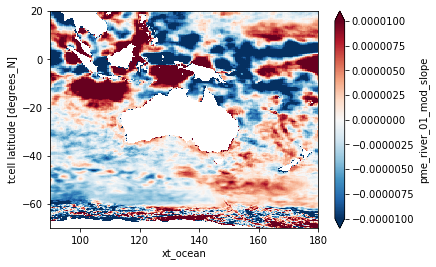

In [7]:
pme_river_01_mod_slope.plot(vmax=0.00001)

Bbox(x0=0.125, y0=0.7158695652173913, x1=0.29347826086956524, y1=0.88)
[0.125, 0.7858695652173913, 0.31097826086956526, 0.9]
Bbox(x0=0.3271739130434783, y0=0.7158695652173913, x1=0.4956521739130435, y1=0.88)
[0.3271739130434783, 0.7858695652173913, 0.5131521739130435, 0.9]
Bbox(x0=0.5293478260869566, y0=0.7158695652173913, x1=0.6978260869565218, y1=0.88)
[0.5293478260869566, 0.7858695652173913, 0.7153260869565218, 0.9]
Bbox(x0=0.7315217391304348, y0=0.7158695652173913, x1=0.9000000000000001, y1=0.88)
[0.8215217391304348, 0.7858695652173913, 1.0075, 0.9]
Bbox(x0=0.125, y0=0.5189130434782608, x1=0.29347826086956524, y1=0.6830434782608695)
[0.125, 0.5289130434782608, 0.31097826086956526, 0.7430434782608695]
Bbox(x0=0.3271739130434783, y0=0.5189130434782608, x1=0.4956521739130435, y1=0.6830434782608695)
[0.3271739130434783, 0.5289130434782608, 0.5131521739130435, 0.7430434782608695]
Bbox(x0=0.5293478260869566, y0=0.5189130434782608, x1=0.6978260869565218, y1=0.6830434782608695)
[0.52934782

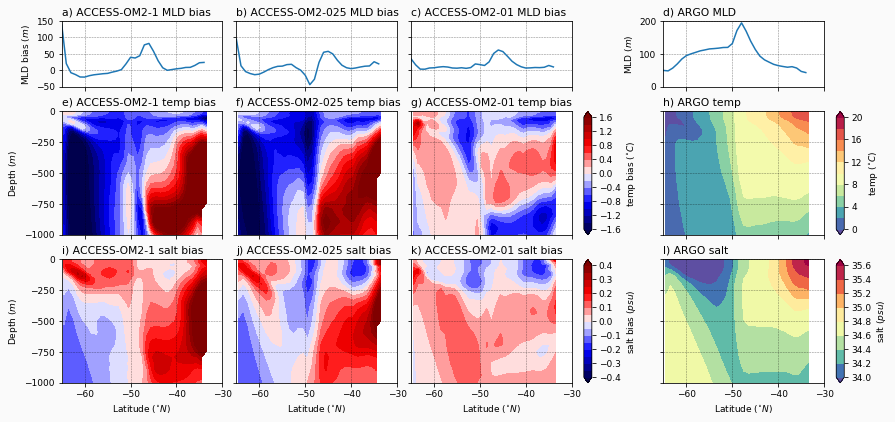

In [64]:
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")

# fig = plt.figure(1, figsize=(8,12), facecolor=[0.98,0.98,0.98]) 
fig = plt.figure(1, figsize=(12,8), facecolor=[0.98,0.98,0.98]) 
matplotlib.rcParams.update({'font.size': 9})    

# plt.suptitle(
#     r'Mixed layer depth ($m$), temperature ($^{\circ}C$) and salinity ($psu$) ' +
#     '\n2004-to-2017 long term mean zonally averaged between 122$^{\circ}E$ and 138$^{\circ}E$',
#     x=0.6,y=1.02, ha='center')

row=4
col=4

ax = plt.subplot(row, col, 1)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.07, pos.x1+0.0175, pos.y1+0.02] 
print(pos_plot)
data = \
mld_z0_1_mod.interp(yt_ocean=mld_z0_obs.lat).mean('year')\
- mld_z0_obs.mean('year')
plot = plt.plot(data.yt_ocean, data)
ax.set_position(bbox(pos_plot))
ax.set_title('a) ACCESS-OM2-1 MLD bias', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -30, 10))
ax.set_yticks(arange(-50, 150, 50))
plt.ylim([-50, 150])
plt.xlim([-65,-30])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('MLD bias ($m$)')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 2)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.07, pos.x1+0.0175, pos.y1+0.02] 
print(pos_plot)
data = \
mld_z0_025_mod.interp(yt_ocean=mld_z0_obs.lat).mean('year')\
- mld_z0_obs.mean('year')
plot = plt.plot(data.yt_ocean, data)
ax.set_position(bbox(pos_plot))
ax.set_title('b) ACCESS-OM2-025 MLD bias', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -30, 10))
ax.set_yticks(arange(-50, 150, 50))
plt.ylim([-50, 150])
plt.xlim([-65,-30])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 3)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.07, pos.x1+0.0175, pos.y1+0.02] 
print(pos_plot)
data = \
mld_z0_01_mod.interp(yt_ocean=mld_z0_obs.lat).mean('year')\
- mld_z0_obs.mean('year')
plot = plt.plot(data.yt_ocean, data)
ax.set_position(bbox(pos_plot))
ax.set_title('c) ACCESS-OM2-01 MLD bias', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -30, 10))
ax.set_yticks(arange(-50, 150, 50))
plt.ylim([-50, 150])
plt.xlim([-65,-30])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 4)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.09, pos.y0+0.07, pos.x1+0.1075, pos.y1+0.02] 
print(pos_plot)
data = mld_z0_obs.mean('year')
plot = plt.plot(data.lat, data)
ax.set_position(bbox(pos_plot))
ax.set_title('d) ARGO MLD', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -30, 10))
ax.set_yticks(arange(0, 300, 100))
plt.ylim([0, 200])
plt.xlim([-65,-30])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('MLD ($m$)')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 5)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.01, pos.x1+0.0175, pos.y1+0.06] 
print(pos_plot)
levels = arange(-1.6,1.6,0.2)
cmap = plt.cm.seismic
data = \
temp_xm128_1_mod.interp(yt_ocean=temp.LATITUDE).interp(st_ocean=temp.PRESSURE).mean('year')\
- temp.mean('year')
plot = plt.contourf(data.yt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
ax.set_position(bbox(pos_plot))
ax.set_title('e) ACCESS-OM2-1 temp bias', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -30, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-65,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('Depth ($m$)')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 6)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.01, pos.x1+0.0175, pos.y1+0.06] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral_r
data = \
temp_xm128_025_mod.interp(yt_ocean=temp.LATITUDE).interp(st_ocean=temp.PRESSURE).mean('year')\
- temp.mean('year')
plot = plt.contourf(data.yt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
ax.set_position(bbox(pos_plot))
ax.set_title('f) ACCESS-OM2-025 temp bias', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -30, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-65,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 7)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.01, pos.x1+0.0175, pos.y1+0.06] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral_r
data = \
temp_xm128_01_mod.interp(yt_ocean=temp.LATITUDE).interp(st_ocean=temp.PRESSURE).mean('year')\
- temp.mean('year')
plot = plt.contourf(data.yt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
ax.set_position(bbox(pos_plot))
ax.set_title('g) ACCESS-OM2-01 temp bias', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -30, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-65,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'temp bias ($^{\circ}C$)', cax=axins)

ax = plt.subplot(row, col, 8)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.09, pos.y0+0.01, pos.x1+0.1075, pos.y1+0.06] 
print(pos_plot)
levels=arange(0,20,2)
cmap = plt.cm.Spectral_r
data = temp.mean('year')
plot = plt.contourf(data.LATITUDE, data.PRESSURE, data,
            cmap=cmap, levels=levels, extend='both')
ax.set_position(bbox(pos_plot))
ax.set_title('h) ARGO temp', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -30, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-65,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'temp ($^{\circ}C$)', cax=axins)

ax = plt.subplot(row, col, 9)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.0175, pos.y1] 
print(pos_plot)
levels = arange(-0.4,0.4,0.05)
cmap = plt.cm.seismic
data = \
salt_xm128_1_mod.interp(yt_ocean=salt.LATITUDE).interp(st_ocean=salt.PRESSURE).mean('year')\
- salt.mean('year')
plot = plt.contourf(data.yt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
ax.set_position(bbox(pos_plot))
ax.set_title('i) ACCESS-OM2-1 salt bias', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -30, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-65,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Latitude ($^{\circ}N$)')
# ax.set_xticklabels('')
ax.set_ylabel('Depth ($m$)')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 10)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral_r
data = \
salt_xm128_025_mod.interp(yt_ocean=salt.LATITUDE).interp(st_ocean=salt.PRESSURE).mean('year')\
- salt.mean('year')
plot = plt.contourf(data.yt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
ax.set_position(bbox(pos_plot))
ax.set_title('j) ACCESS-OM2-025 salt bias', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -30, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-65,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Latitude ($^{\circ}N$)')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 11)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+-0.05, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral_r
data = \
salt_xm128_01_mod.interp(yt_ocean=salt.LATITUDE).interp(st_ocean=salt.PRESSURE).mean('year')\
- salt.mean('year')
plot = plt.contourf(data.yt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
ax.set_position(bbox(pos_plot))
ax.set_title('k) ACCESS-OM2-01 salt bias', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -30, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-65,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Latitude ($^{\circ}N$)')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'salt bias ($psu$)', cax=axins)

ax = plt.subplot(row, col, 12)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.09, pos.y0-0.05, pos.x1+0.1075, pos.y1] 
print(pos_plot)
levels=arange(34,35.6,0.2)
cmap = plt.cm.Spectral_r
data = salt.mean('year') 
plot = plt.contourf(data.LATITUDE, data.PRESSURE, data,
            cmap=cmap, levels=levels, extend='both')
ax.set_position(bbox(pos_plot))
ax.set_title('l) ARGO salt', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -30, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-65,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Latitude ($^{\circ}N$)')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'salt ($psu$)', cax=axins)

savefigure('xm128_ltm')

Bbox(x0=0.125, y0=0.7158695652173913, x1=0.29347826086956524, y1=0.88)
[0.125, 0.7858695652173913, 0.31097826086956526, 0.94]
Bbox(x0=0.3271739130434783, y0=0.7158695652173913, x1=0.4956521739130435, y1=0.88)
[0.3271739130434783, 0.7858695652173913, 0.5131521739130435, 0.94]
Bbox(x0=0.5293478260869566, y0=0.7158695652173913, x1=0.6978260869565218, y1=0.88)
[0.5293478260869566, 0.7858695652173913, 0.7153260869565218, 0.94]
Bbox(x0=0.125, y0=0.5189130434782608, x1=0.29347826086956524, y1=0.6830434782608695)
[0.125, 0.5889130434782608, 0.31097826086956526, 0.7430434782608695]
Bbox(x0=0.3271739130434783, y0=0.5189130434782608, x1=0.4956521739130435, y1=0.6830434782608695)
[0.3271739130434783, 0.5889130434782608, 0.5131521739130435, 0.7430434782608695]
Bbox(x0=0.5293478260869566, y0=0.5189130434782608, x1=0.6978260869565218, y1=0.6830434782608695)
[0.5293478260869566, 0.5889130434782608, 0.7153260869565218, 0.7430434782608695]
Bbox(x0=0.7315217391304348, y0=0.5189130434782608, x1=0.90000000

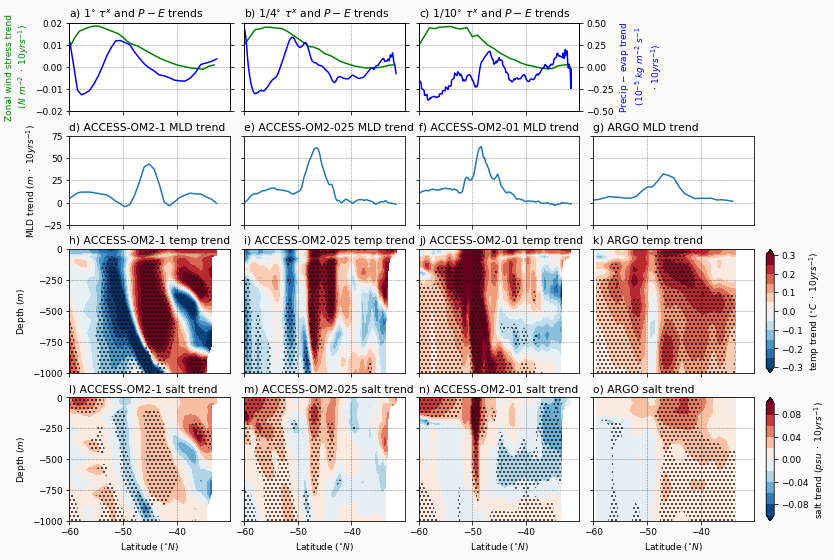

In [11]:
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")

# fig = plt.figure(1, figsize=(8,12), facecolor=[0.98,0.98,0.98]) 
fig = plt.figure(1, figsize=(12,8), facecolor=[0.98,0.98,0.98]) 
matplotlib.rcParams.update({'font.size': 9})    

# plt.suptitle(
#     r'Mixed layer depth ($m$), temperature ($^{\circ}C$) and salinity ($psu$) ' +
#     '\n2004-to-2017 decadal trend zonally averaged between 122$^{\circ}E$ and 138$^{\circ}E$',
#     x=0.5,y=1.02, ha='center')

row=4
col=4

lonW = 122
lonE = 138
latN = -30
latS = -70

ax = plt.subplot(row, col, 1)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.07, pos.x1+0.0175, pos.y1+0.06] 
print(pos_plot)
data = tau_x_z0_1_slope_mod.sel(yu_ocean=slice(latS,latN)).sel(xu_ocean=slice(lonW,lonE)).mean('xu_ocean')
plot = ax.plot(data.yu_ocean, data, 'g-')
ax2 = ax.twinx()
data = pme_river_1_mod_slope.sel(yt_ocean=slice(latS,latN)).sel(xt_ocean=slice(lonW,lonE)).mean('xt_ocean')*10**5
plot = ax2.plot(data.yt_ocean, data, 'b-')
ax.set_ylim([-0.02, 0.02])
ax2.set_ylim([-0.5, 0.5])
ax.set_position(bbox(pos_plot))
ax.set_title(r'a) $1^{\circ}$ $\tau^x$ and $P-E$ trends', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-70, -40, 10))
# ax.set_yticks(arange(-25, 75, 25))
# plt.ylim([-25, 75])
plt.xlim([-60,-30])
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('Zonal wind stress trend\n ($N\ m^{-2}\ \cdot\ 10yrs^{-1}$)', color='g')
ax2.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 2)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.07, pos.x1+0.0175, pos.y1+0.06] 
print(pos_plot)
data = tau_x_z0_025_slope_mod.sel(yu_ocean=slice(latS,latN)).sel(xu_ocean=slice(lonW,lonE)).mean('xu_ocean')
plot = ax.plot(data.yu_ocean, data, 'g-')
ax2 = ax.twinx()
data = pme_river_025_mod_slope.sel(yt_ocean=slice(latS,latN)).sel(xt_ocean=slice(lonW,lonE)).mean('xt_ocean')*10**5
plot = ax2.plot(data.yt_ocean, data, 'b-')
# ax.set_yticks(color='g')
# ax2.set_yticks(color='b')
ax.set_ylim([-0.02, 0.02])
ax2.set_ylim([-0.5, 0.5])
ax.set_position(bbox(pos_plot))
ax.set_title(r'b) $1/4^{\circ}$ $\tau^x$ and $P-E$ trends', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-70, -40, 10))
# ax.set_yticks(arange(-25, 75, 25))
# plt.ylim([-25, 75])
plt.xlim([-60,-30])
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax2.set_ylabel('')
ax.set_yticklabels('')
ax2.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 3)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.07, pos.x1+0.0175, pos.y1+0.06] 
print(pos_plot)
data = tau_x_z0_01_slope_mod.sel(yu_ocean=slice(latS,latN)).sel(xu_ocean=slice(lonW,lonE)).mean('xu_ocean')
plot = ax.plot(data.yu_ocean, data, 'g-')
ax2 = ax.twinx()
data = pme_river_01_mod_slope.sel(yt_ocean=slice(latS,latN)).sel(xt_ocean=slice(lonW,lonE)).mean('xt_ocean')*10**5
plot = ax2.plot(data.yt_ocean, data, 'b-')
# ax.set_yticks(color='g')
# ax2.set_yticks(color='b')
ax.set_ylim([-0.02, 0.02])
ax2.set_ylim([-0.5, 0.5])
ax.set_position(bbox(pos_plot))
ax.set_title(r'c) $1/10^{\circ}$ $\tau^x$ and $P-E$ trends', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-70, -40, 10))
# ax.set_yticks(arange(-25, 75, 25))
# plt.ylim([-25, 75])
plt.xlim([-60,-30])
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax2.set_ylabel('Precip $-$ evap trend\n ($10^{-5}\ kg\ m^{-2}\ s^{-1}$\n $\cdot\ 10yrs^{-1}$)', color='b')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 5)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.07, pos.x1+0.0175, pos.y1+0.06] 
print(pos_plot)
data = mld_z0_1_slope_mod
plot = plt.plot(data.yt_ocean, data)
ax.set_position(bbox(pos_plot))
ax.set_title('d) ACCESS-OM2-1 MLD trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-70, -40, 10))
ax.set_yticks(arange(-25, 75, 25))
plt.ylim([-25, 75])
plt.xlim([-60,-30])
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('MLD trend ($m\ \cdot\ 10yrs^{-1}$)')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 6)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.07, pos.x1+0.0175, pos.y1+0.06] 
print(pos_plot)
data = mld_z0_025_slope_mod
plot = plt.plot(data.yt_ocean, data)
ax.set_position(bbox(pos_plot))
ax.set_title('e) ACCESS-OM2-025 MLD trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-70, -40, 10))
ax.set_yticks(arange(-25, 75, 25))
plt.ylim([-25, 75])
plt.xlim([-60,-30])
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 7)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.07, pos.x1+0.0175, pos.y1+0.06] 
print(pos_plot)
data = mld_z0_01_slope_mod
plot = plt.plot(data.yt_ocean, data)
ax.set_position(bbox(pos_plot))
ax.set_title('f) ACCESS-OM2-01 MLD trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-70, -40, 10))
ax.set_yticks(arange(-25, 75, 25))
plt.ylim([-25, 75])
plt.xlim([-60,-30])
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 8)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.07, pos.x1+0.0175, pos.y1+0.06] 
print(pos_plot)
data = mld_z0_slope_obs
plot = plt.plot(data.lat, data)
ax.set_position(bbox(pos_plot))
ax.set_title('g) ARGO MLD trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-70, -40, 10))
ax.set_yticks(arange(-25, 75, 25))
plt.ylim([-25, 75])
plt.xlim([-60,-30])
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 9)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.01, pos.x1+0.0175, pos.y1+0.06] 
print(pos_plot)
levels=arange(-0.3,0.3,0.05)
cmap = plt.cm.RdBu_r
data = temp_xm128_1_slope_mod
plot = plt.contourf(data.yt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_xm128_1_p_value_mod
plot2 = plt.contourf(data.yt_ocean, data.st_ocean, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('h) ACCESS-OM2-1 temp trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -40, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-60,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('Depth ($m$)')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 10)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.01, pos.x1+0.0175, pos.y1+0.06] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral_r
data = temp_xm128_025_slope_mod
plot = plt.contourf(data.yt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_xm128_025_p_value_mod
plot2 = plt.contourf(data.yt_ocean, data.st_ocean, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('i) ACCESS-OM2-025 temp trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -40, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-60,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 11)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.01, pos.x1+0.0175, pos.y1+0.06] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral_r
data = temp_xm128_01_slope_mod
plot = plt.contourf(data.yt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_xm128_01_p_value_mod
plot2 = plt.contourf(data.yt_ocean, data.st_ocean, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('j) ACCESS-OM2-01 temp trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -40, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-60,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')

ax = plt.subplot(row, col, 12)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.01, pos.x1+0.0175, pos.y1+0.06] 
print(pos_plot)
# levels=arange(0,20,2)
# cmap = plt.cm.Spectral_r
data = temp_slope
plot = plt.contourf(data.lat, data.depth, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_p_value
plot2 = plt.contourf(data.lat, data.depth, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('k) ARGO temp trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -40, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-60,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'temp trend ($^{\circ}C\ \cdot\ 10yrs^{-1}$)', cax=axins)

ax = plt.subplot(row, col, 13)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.0175, pos.y1] 
print(pos_plot)
levels=arange(-0.1,0.1,0.02)
cmap = plt.cm.RdBu_r
data = salt_xm128_1_slope_mod
plot = plt.contourf(data.yt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = salt_xm128_1_p_value_mod
plot2 = plt.contourf(data.yt_ocean, data.st_ocean, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('l) ACCESS-OM2-1 salt trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -40, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-60,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Latitude ($^{\circ}N$)')
# ax.set_xticklabels('')
ax.set_ylabel('Depth ($m$)')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 14)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral_r
data = salt_xm128_025_slope_mod
plot = plt.contourf(data.yt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = salt_xm128_025_p_value_mod
plot2 = plt.contourf(data.yt_ocean, data.st_ocean, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('m) ACCESS-OM2-025 salt trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -40, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-60,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Latitude ($^{\circ}N$)')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 15)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral_r
data = salt_xm128_01_slope_mod
plot = plt.contourf(data.yt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = salt_xm128_01_p_value_mod
plot2 = plt.contourf(data.yt_ocean, data.st_ocean, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('n) ACCESS-OM2-01 salt trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -40, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-60,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Latitude ($^{\circ}N$)')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')

ax = plt.subplot(row, col, 16)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(0,20,2)
# cmap = plt.cm.Spectral_r
data = salt_slope
plot = plt.contourf(data.lat, data.depth, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = salt_p_value
plot2 = plt.contourf(data.lat, data.depth, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('o) ARGO salt trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(-60, -40, 10))
ax.set_yticks(arange(-2000, 0, 250))
plt.xlim([-60,-30]), plt.ylim([-1000,0])
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Latitude ($^{\circ}N$)')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'salt trend ($psu\ \cdot\ 10yrs^{-1}$)', cax=axins)

savefigure('xm128_trend')